In [17]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [18]:
catagories = {0:'airplane',
             1:'automobile',
             2:'bird',
             3:'cat',
             4:'deer',
             5:'dog',
             6:'frog',
             7:'horse',
             8:'ship',
             9:'truck'}

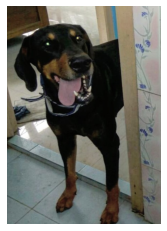

In [19]:
image = cv2.imread("C:\\Users\\M1050683\\Documents\\OpenVINO_training\\Neural_networks\\Testing_models\\Test_folder\\2.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off")
plt.show()

In [22]:
def load_image(filename):
    img = load_img(filename, target_size=(64, 64))
    img = img_to_array(img)
    img = img.reshape(1, 64, 64, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example(img_):
    img = load_image(test_dir+img_)
    model = load_model('Image_classification_TF.model')
    result = model.predict(img)
#     print("Prediction Probab :",result)
    return np.argmax(result,axis=1)

test_dir = "C:\\Users\\M1050683\\Documents\\OpenVINO_training\\Neural_networks\\Testing_models\\Test_folder\\"
files = os.listdir(test_dir)
file_list = [img_ for img_ in files]
print(file_list)

prediction = []
for img_ in file_list:
    res= run_example(img_)
    predictions = [catagories[k] for k in res]
    print("Predicted:",predictions)
    prediction.append(predictions[0])
print(prediction)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
Predicted: ['cat']
Predicted: ['cat']
Predicted: ['truck']
Predicted: ['horse']
Predicted: ['cat']
['cat', 'cat', 'truck', 'horse', 'cat']


In [27]:
actual = ["ship","dog","automobile","dog","cat"]
for i in range(len(actual)):
    print("Actual:",actual[i],"   Predicted:",prediction[i])

Actual: ship    Predicted: cat
Actual: dog    Predicted: cat
Actual: automobile    Predicted: truck
Actual: dog    Predicted: horse
Actual: cat    Predicted: cat
